In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
drug_tf_activities = pd.read_csv('../results/drug_signatures/signatures_bing_gene_dorothea.csv', sep=',', header=0,
                     index_col=0)

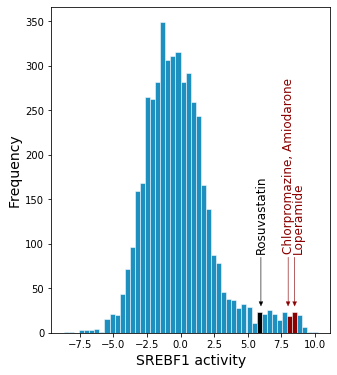

In [5]:
data = drug_tf_activities['SREBF1']
fig, ax = plt.subplots(figsize = (5,6))
N, bins, patches = plt.hist(drug_tf_activities['SREBF1'], edgecolor='white', linewidth=0.5, bins = 50, color = "#1d90c0")
loper = drug_tf_activities.loc['loperamide', 'SREBF1']
amio = drug_tf_activities.loc['amiodarone', 'SREBF1']
cp = drug_tf_activities.loc['chlorpromazine', 'SREBF1']
rosu = drug_tf_activities.loc['rosuvastatin', 'SREBF1']

for drug in [loper, amio, cp]:
    for i in range(len(bins)):
        if bins[i] > drug:
            patches[i-1].set_facecolor('darkred')
            break       
for drug in [rosu]:
    for i in range(len(bins)):
        if bins[i] > drug:
            patches[i-1].set_facecolor('black')
            break       

            
plt.arrow(rosu, 85, 0, -50, head_width=0.3, head_length=5, color='k', linewidth = 0.3)
plt.arrow(cp, 85, 0, -50, head_width=0.3, head_length=5, color='darkred', linewidth = 0.3)
plt.arrow(loper+0.1, 85, 0, -50, head_width=0.3, head_length=5, color='darkred', linewidth = 0.3)

plt.text(rosu, 92, 'Rosuvastatin', color='k', rotation = 90, ha = 'center', fontsize = 12)
plt.text(cp, 92, 'Chlorpromazine, Amiodarone', color='darkred', rotation = 90, ha = 'center', fontsize = 12)
plt.text(loper-0.1, 92,'Loperamide', color='darkred', rotation = 90, ha = 'left', fontsize = 12)

plt.xlabel('SREBF1 activity', fontsize=14)
plt.ylabel('Frequency',  fontsize=14)            
plt.show()

In [6]:
loper, amio, cp

(8.38914158803728, 8.111052198082481, 8.00115295346842)

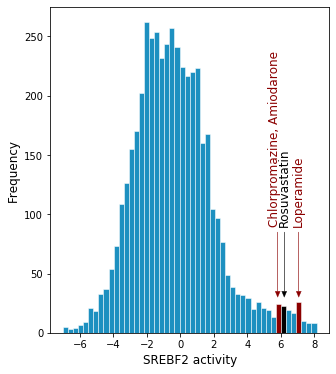

In [7]:
fig, axs = plt.subplots(figsize = (5,6))
N, bins, patches = plt.hist(drug_tf_activities['SREBF2'], edgecolor='white', linewidth=0.5, bins = 50, color = "#1d90c0")
loper = drug_tf_activities.loc['loperamide', 'SREBF2']
amio = drug_tf_activities.loc['amiodarone', 'SREBF2']
cp = drug_tf_activities.loc['chlorpromazine', 'SREBF2']
rosu = drug_tf_activities.loc['rosuvastatin', 'SREBF2']

for drug in [loper, amio, cp]:
    for i in range(len(bins)):
        if bins[i] > drug:
            patches[i-1].set_facecolor('darkred')
            break       
for drug in [rosu]:
    for i in range(len(bins)):
        if bins[i] > drug:
            patches[i-1].set_facecolor('black')
            break
            
plt.arrow(rosu+0.15, 85, 0, -50, head_width=0.3, head_length=5, color='k', linewidth = 0.3)
plt.arrow(cp-0.1, 85, 0, -50, head_width=0.3, head_length=5, color='darkred', linewidth = 0.3)
plt.arrow(loper+0.1, 85, 0, -50, head_width=0.3, head_length=5, color='darkred', linewidth = 0.3)

plt.text(rosu+0.15, 92, 'Rosuvastatin', color='k', rotation = 90, ha = 'center', fontsize = 12)
plt.text(cp+0.1, 92, 'Chlorpromazine, Amiodarone', color='darkred', rotation = 90, ha = 'right', fontsize = 12)
plt.text(loper+0.1, 92,'Loperamide', color='darkred', rotation = 90, ha = 'center', fontsize = 12)

plt.xlabel('SREBF2 activity', fontsize=12)
plt.ylabel('Frequency',  fontsize=12)            
plt.show()

# Linear models

In [ ]:
# # filtered with std
# exp1a = pd.read_csv('../results/results_from_cloud/exp1a_results_lp_std023_mp_complete.csv', index_col = 0)
# exp1b = pd.read_csv('../results/results_from_cloud/exp1b_results_lp_std023_mp_complete.csv', index_col = 0)
# exp2a = pd.read_csv('../results/results_from_cloud/exp2a_results_lp_std015_mp_complete.csv', index_col = 0)
# exp2b = pd.read_csv('../results/results_from_cloud/exp2b_results_lp_std015_mp_complete.csv', index_col = 0)
# exp3a = pd.read_csv('../results/results_from_cloud/exp3a_results_lp_std0135_mp_complete.csv', index_col = 0)
# exp3b = pd.read_csv('../results/results_from_cloud/exp3b_results_lp_std0135_mp_complete.csv', index_col = 0)
# exp3c = pd.read_csv('../results/results_from_cloud/exp3c_results_lp_std0135_mp_complete.csv', index_col = 0)
# exp4a = pd.read_csv('../results/results_from_cloud/exp4a_results_lp_std015_mp_complete.csv', index_col = 0)
# exp4b = pd.read_csv('../results/results_from_cloud/exp4b_results_lp_std015_mp_complete.csv', index_col = 0)

In [8]:
exp1a = pd.read_csv('../results/results_from_cloud/exp1a_results_lp3_mp_complete.csv', index_col = 0)
exp1b = pd.read_csv('../results/results_from_cloud/exp1b_results_lp3_mp_complete.csv', index_col = 0)
exp2a = pd.read_csv('../results/results_from_cloud/exp2a_results_lp3_mp_complete.csv', index_col = 0)
exp2b = pd.read_csv('../results/results_from_cloud/exp2b_results_lp3_mp_complete.csv', index_col = 0)
exp3a = pd.read_csv('../results/results_from_cloud/exp3a_results_lp3_mp_complete.csv', index_col = 0)
exp3b = pd.read_csv('../results/results_from_cloud/exp3b_results_lp3_mp_complete.csv', index_col = 0)
exp3c = pd.read_csv('../results/results_from_cloud/exp3c_results_lp3_mp_complete.csv', index_col = 0)

In [9]:
exp1a['ExpID'] = 'exp1'+'_'+exp1a['WellRegion']
exp1b['ExpID'] = 'exp1'+'_'+exp1b['WellRegion']
exp2a['ExpID'] = 'exp2'+'_'+exp2a['WellRegion']
exp2b['ExpID'] = 'exp2'+'_'+exp2b['WellRegion']
exp3a['ExpID'] = 'exp3'+'_'+exp3a['WellRegion']
exp3b['ExpID'] = 'exp3'+'_'+exp3b['WellRegion']
exp3c['ExpID'] = 'exp3'+'_'+exp3c['WellRegion']

In [10]:
exp1a.TimePoint = exp1a.TimePoint - 4
exp2a.TimePoint = exp2a.TimePoint - 4
exp3a.TimePoint = exp3a.TimePoint - 4
exp3c.TimePoint = exp3c.TimePoint + 12

In [11]:
exp1 = exp1a.append(exp1b).reset_index()
exp2 = exp2a.append(exp2b).reset_index()
exp3bc = exp3b.append(exp3c).reset_index()
exp3 = exp3a.append(exp3bc).reset_index()

In [12]:
exp12 = exp1b.append(exp2b)
exp_all_treatment = exp12.append(exp3bc)

In [13]:
exp_all_treatment = exp_all_treatment[exp_all_treatment['TimePoint'] <= 20].copy()
exp_all_treatment["Drug"] = pd.Categorical(exp_all_treatment["Drug"], categories = ["dmso", "amio", "cp", "loper","mbcd", "rosu"])

In [14]:
# exp_all_treatment.to_csv('../results/results_from_cloud/exp_all_treatment_lp3_mp_complete.csv')

In [15]:
model = ols('logRatio ~ ExpID + TimePoint * Drug', data=exp_all_treatment).fit()

In [16]:
params = model.params[model.params.index.str.contains(':')]

In [17]:
p_values = model.pvalues[model.pvalues.index.str.contains(':')]

In [18]:
stat = pd.DataFrame({'coeff': params,'p_values':p_values}, index = params.index)

In [19]:
drugmap = {'amio': 'amiodarone', 'cp':'chlorpromazine', 'loper':'loperamide', 'mbcd':'MBCD', 'rosu':'rosuvastatin'}

In [20]:
stat.index =map(lambda x: drugmap[x[1].split('T.')[1][0:-1]] , enumerate(stat.index))

In [21]:
stat.sort_values('coeff').style.format('{:,.2e}'.format)

,coeff,p_values
MBCD,-1.10e-02,2.90e-63
chlorpromazine,-4.25e-03,1.67e-11
amiodarone,-2.92e-03,8.08e-06
loperamide,1.80e-03,5.50e-03
rosuvastatin,4.78e-03,6.78e-12


In [22]:
exp12 = exp1.append(exp2)
exp_all = exp12.append(exp3)

In [23]:
# exp_all.to_csv('../results/results_from_cloud/exp_all_lp3_mp_complete.csv')

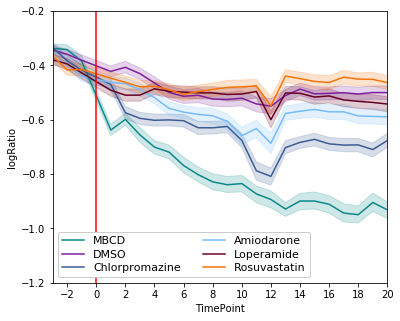

In [85]:
fig, ax = plt.subplots(figsize=(6, 5))
plot = sns.lineplot(data=exp_all, x="TimePoint", y="logRatio", hue = 'Drug', 
                    palette = sns.xkcd_palette(['dark cyan', 'purple', 'denim blue', 'sky blue', 'maroon', 'orange'])
                   )
plt.axvline(0, color = 'r')
plt.xticks(np.arange(-2, 21, 2))
plot.set(xlim=(-3, 20))
plot.set(ylim=(-1.2, -0.2))

plt.legend(labels=['MBCD', 'DMSO', 'Chlorpromazine', 'Amiodarone', 'Loperamide', 'Rosuvastatin'], 
           ncol=2, loc='lower left', framealpha = 1, fontsize = 11, labelspacing = 0.3)